In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pydataset

In [2]:
# Datasets
iris = sns.load_dataset('iris') # this one is actually in both seaborn and pydataset
swiss = pydataset.data('swiss')
insect_sprays = pydataset.data('InsectSprays')
sleep_study = pydataset.data('sleepstudy')

## Use the iris database to answer the following quesitons:

- What does the distribution of petal lengths look like?
- Is there a correlation between petal length and petal width?
- Would it be reasonable to predict species based on sepal width and sepal length?
- Which features would be best used to predict species?

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


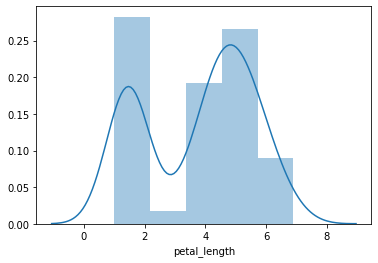

In [4]:
# What does the distribution of petal lengths look like?
sns.distplot(iris.petal_length)

Text(1.5, 2, 'r = 0.96')

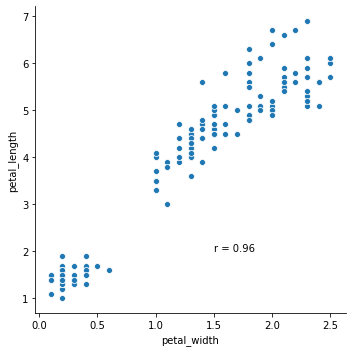

In [5]:
# Is there a correlation between petal length and petal width?
sns.relplot(x="petal_width", y="petal_length", data=iris)

r = iris.corr().loc['petal_length', 'petal_width']
plt.text(1.5, 2, f'r = {r:.2}')


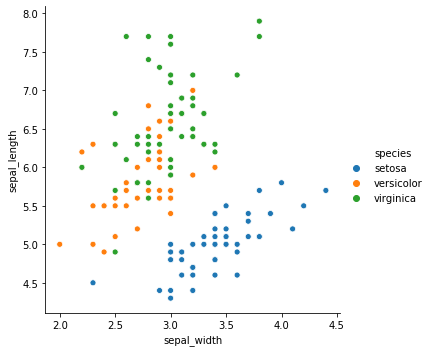

In [6]:
# Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

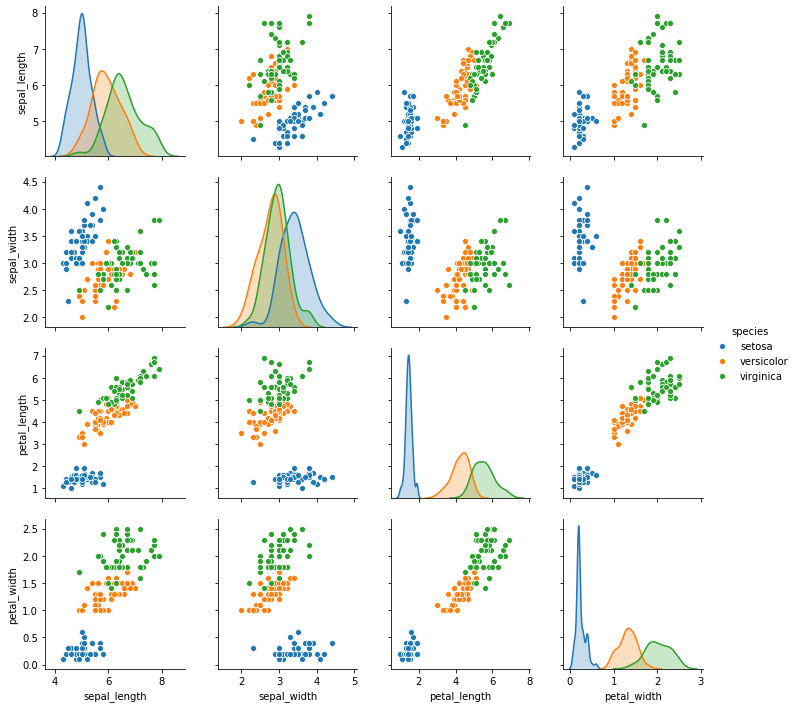

In [7]:
# Which features would be best used to predict species?
sns.pairplot(iris, hue="species")

## Anscombe's Quartet
- Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
- Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [8]:
quartet = sns.load_dataset("anscombe")

In [9]:
quartet.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [10]:
quartet.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

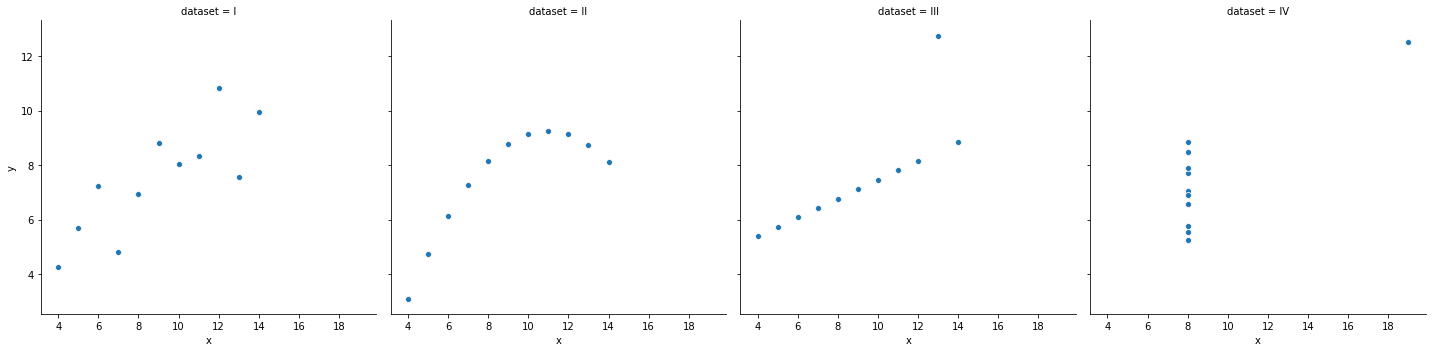

In [11]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x="x", y="y", col="dataset", data=quartet)

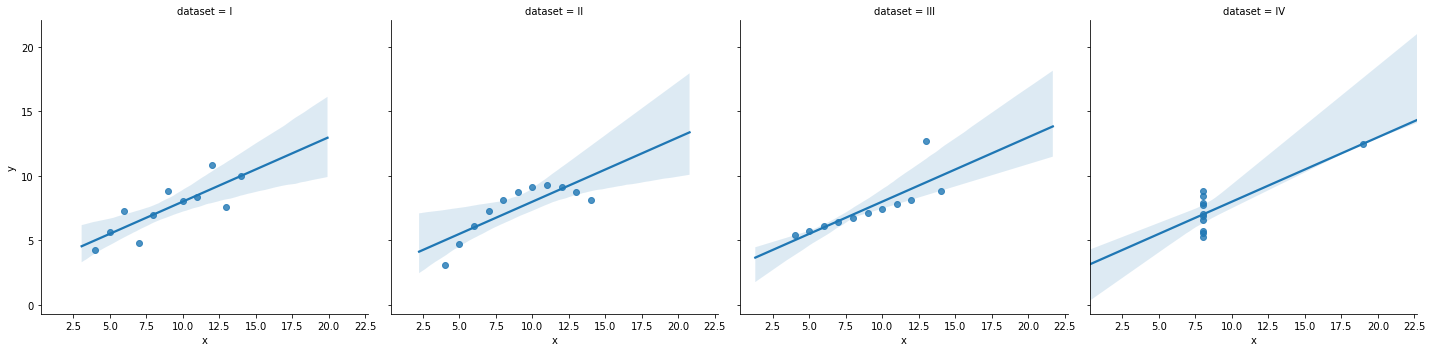

In [12]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
# Add a linear model for each dataset
sns.lmplot(x="x", y="y", col="dataset", data=quartet)

## Load the InsectSprays dataset and read it's documentation. 
- Create a boxplot that shows the effectiveness of the different insect sprays.



In [13]:
pydataset.data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [14]:
insect_sprays = pydataset.data('InsectSprays')

In [15]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


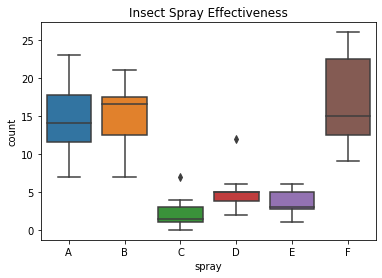

In [16]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
plt.title("Insect Spray Effectiveness")
sns.boxplot(data=insect_sprays, y='count', x='spray')

In [17]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
pydataset.data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [18]:
swiss = pydataset.data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [19]:
swiss["is_catholic"] = swiss.Catholic.apply(lambda x: "Catholic" if x >= 80 else "Not Catholic")

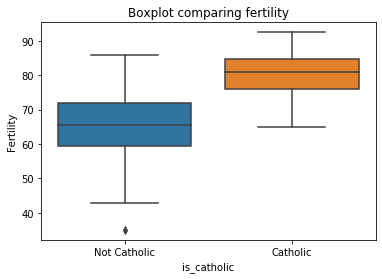

In [20]:
plt.title("Boxplot comparing fertility")
sns.boxplot(data=swiss, y="Fertility", x="is_catholic")

In [21]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,Not Catholic
Delemont,83.1,45.1,6,9,84.84,22.2,Catholic
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Catholic
Moutier,85.8,36.5,12,7,33.77,20.3,Not Catholic
Neuveville,76.9,43.5,17,15,5.16,20.6,Not Catholic


In [22]:
# What measure correlates most strongly with fertility?
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64

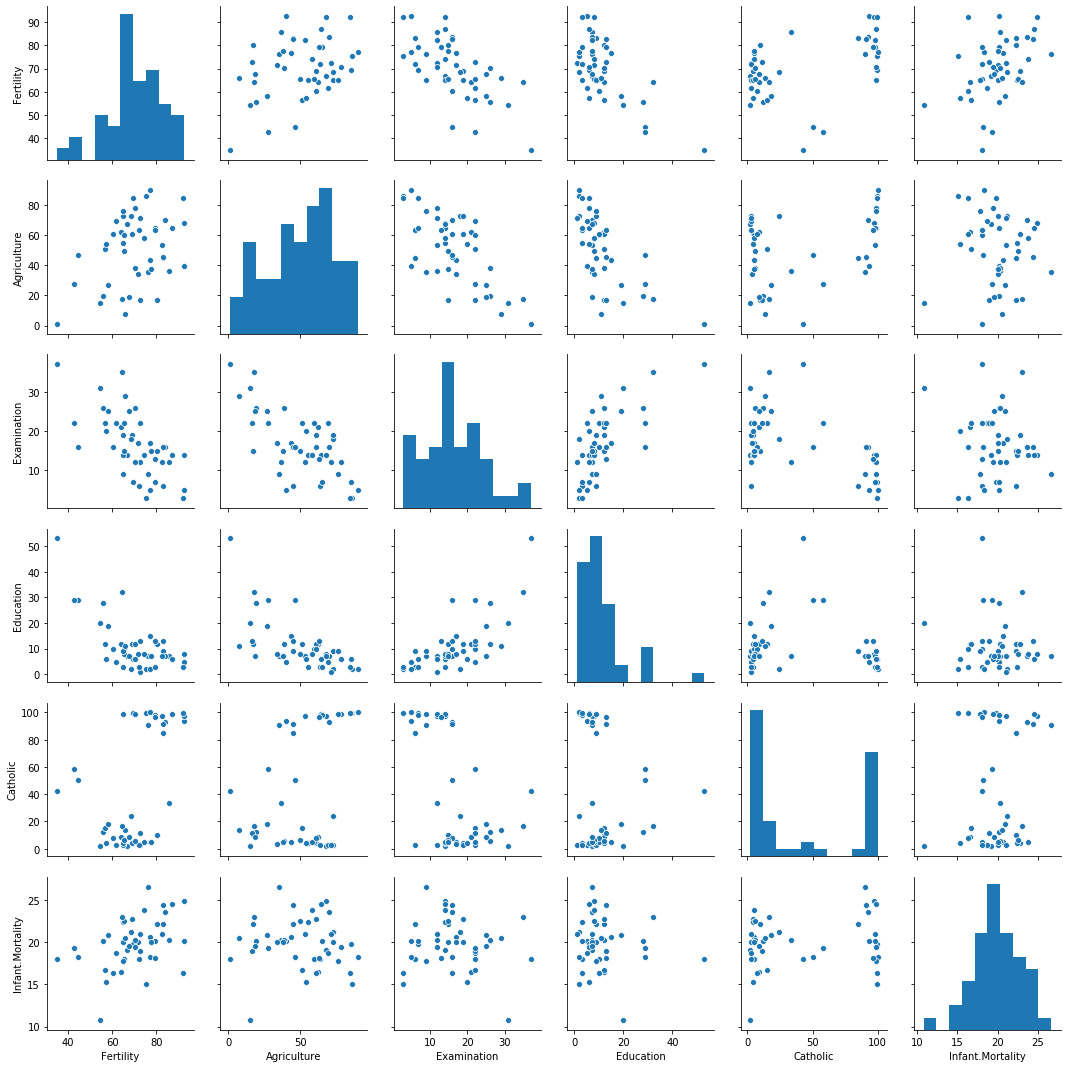

In [23]:
# What measure correlates most strongly with fertility?
# Distribution of compared values matters a great deal
sns.pairplot(swiss)

# Using the chipotle dataset from the previous exercise
- create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [24]:
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [25]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [26]:
# Convert the item_price column into a float
orders.item_price = orders.item_price.str.replace('$', '').astype('float')

In [27]:
# Testing to see if the "item_price" column captures the quantity * price
chips_and_salsa = orders[orders.item_name == "Chips and Fresh Tomato Salsa"]
chips_and_salsa.sort_values("quantity", ascending=False)

,id,order_id,quantity,item_name,choice_description,item_price
3598,3599,1443,15,Chips and Fresh Tomato Salsa,nan,44.25
1257,1258,511,4,Chips and Fresh Tomato Salsa,nan,11.80
2267,2268,912,2,Chips and Fresh Tomato Salsa,nan,5.90
2729,2730,1083,2,Chips and Fresh Tomato Salsa,nan,5.90
1882,1883,759,2,Chips and Fresh Tomato Salsa,nan,5.90
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
2910,2911,1156,1,Chips and Fresh Tomato Salsa,nan,2.39
3232,3233,1293,1,Chips and Fresh Tomato Salsa,nan,2.95
3228,3229,1291,1,Chips and Fresh Tomato Salsa,nan,2.39
3226,3227,1290,1,Chips and Fresh Tomato Salsa,nan,2.39


In [28]:
orders.groupby("item_name").sum().head()

,id,order_id,quantity,item_price
item_name,,,,
6 Pack Soft Drink,130372,52322,55,356.95
Barbacoa Bowl,134330,53972,66,672.36
Barbacoa Burrito,186070,74718,91,894.75
Barbacoa Crispy Tacos,13836,5613,12,120.21
Barbacoa Salad Bowl,24171,9708,10,106.40


In [29]:
order_revenue = orders[["item_name", "item_price"]]
order_revenue.head()

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98


In [30]:
order_revenue = order_revenue.groupby("item_name").sum()
order_revenue.head()

,item_price
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21
Barbacoa Salad Bowl,106.40


In [31]:
order_revenue.rename(columns={'item_price': 'revenue'}, inplace=True)
order_revenue.head()

,revenue
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21
Barbacoa Salad Bowl,106.40


In [32]:
top_4_items = order_revenue.revenue.sort_values(ascending=False).head(4)
top_4_items

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: revenue, dtype: float64

In [33]:
top_4_items = pd.DataFrame(top_4_items).reset_index()
top_4_items

,item_name,revenue
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19


Text(0.5, 1.0, 'Gross Revenue by Item')

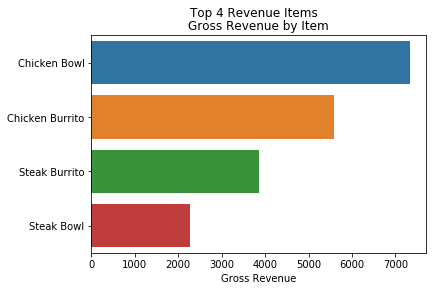

In [34]:
sns.barplot(data=top_4_items, y='item_name', x='revenue')
plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Top 4 Revenue Items")
plt.title("Gross Revenue by Item")

## Sleep Study Data
- Load the sleepstudy data and read it's documentation. 
- Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [35]:
pydataset.data("sleep", show_doc=True)

sleep

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Student's Sleep Data

### Description

Data which show the effect of two soporific drugs (increase in hours of sleep
compared to control) on 10 patients.

### Usage

    sleep

### Format

A data frame with 20 observations on 3 variables.

[, 1]

extra

numeric

increase in hours of sleep

[, 2]

group

factor

drug given

[, 3]

ID

factor

patient ID

### Details

The `group` variable name may be misleading about the data: They represent
measurements on 10 persons, not in groups.

### Source

Cushny, A. R. and Peebles, A. R. (1905) The action of optical isomers: II
hyoscines. _The Journal of Physiology_ **32**, 501–510.

Student (1908) The probable error of the mean. _Biometrika_, **6**, 20.

### References

Scheffé, Henry (1959) _The Analysis of Variance_. New York, NY: Wiley.

### Examples

    require(stats)
    ## Student's paired t-test
    with(sleep,
         t.test(extra[group =

In [36]:
sleep = pydataset.data("sleepstudy")

In [37]:
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [38]:
sleep.Subject = 'subject_' + sleep.Subject.astype(str)
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,subject_308
2,258.7047,1,subject_308
3,250.8006,2,subject_308
4,321.4398,3,subject_308
5,356.8519,4,subject_308


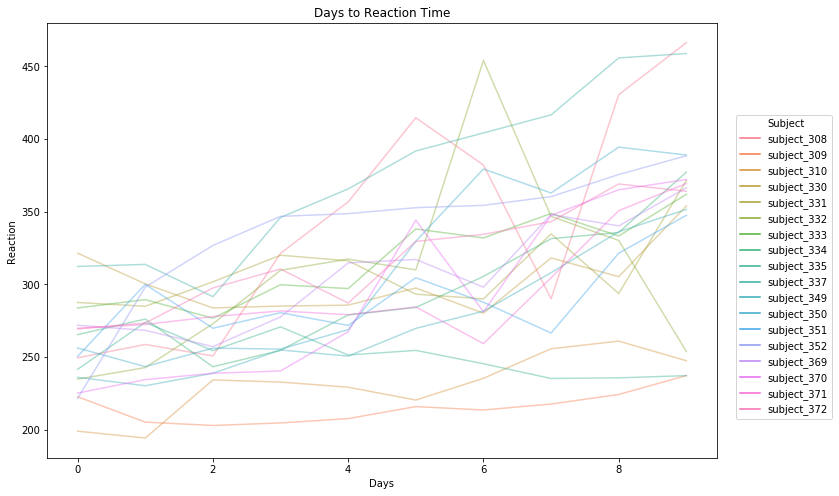

In [39]:
plt.figure(figsize=(12, 8))
plt.title("Days to Reaction Time")
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=False, ncol=1)


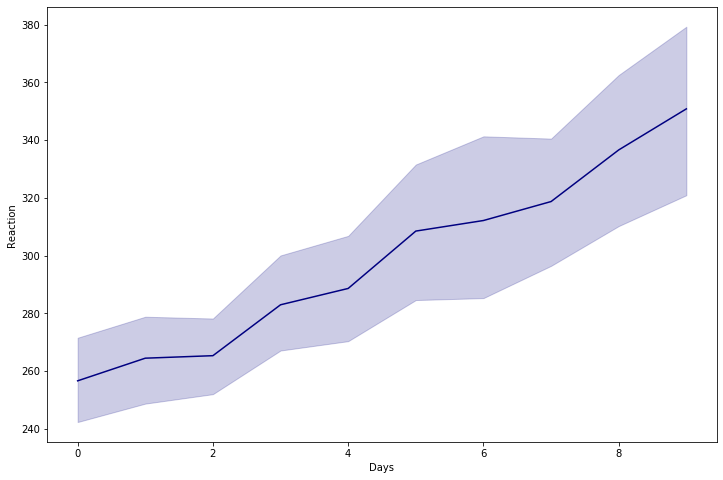

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

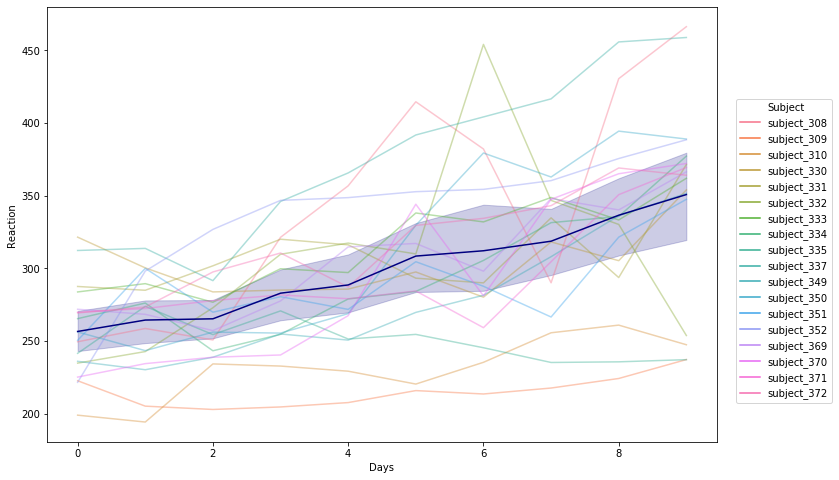

In [41]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=False, ncol=1)